In [1]:
import pandas as pd
import time
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from konlpy.tag import Mecab
from collections import Counter
from math import  pi
import math
import matplotlib.pyplot as plt
from datetime import datetime
from emoji import core

import re

mecab = Mecab()

import matplotlib.font_manager as fm
from nltk.tokenize import sent_tokenize
from nltk.corpus import gutenberg
from emoji import core
import seaborn as sns
import numpy as np
import nltk
import os
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ssh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df_com = pd.read_csv('./data/cafe_comment.csv')
df_main = pd.read_csv('./data/cafe_main.csv')
df_com.drop(['text_number'], axis=1, inplace=True)
df_com['etc'] = '댓글'
df_main.drop(['date','click','text_number'], axis=1, inplace=True)
df_main['etc'] = '본문'
df_com.rename(columns={'comment' : 'text'}, inplace=True)
df = pd.concat([df_com,df_main])
df.sort_values('title')
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(['text'], inplace=True)

display(df.isnull().sum())
df.fillna('_',inplace=True)

display(df)

text          1
nickname      0
title         0
board_name    0
topic         0
cafe_name     0
cafe_id       0
yyyy          0
mm            0
etc           0
dtype: int64

,text,nickname,title,board_name,topic,cafe_name,cafe_id,yyyy,mm,etc
0,추천드리고싶진 않지만.. 시부모님이 티칭이나 코칭이 어려우시면 패드(스마트학습)으로...,몽몽,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요??,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
1,스마트 학습 이라는 것도 있군요!!! 감사합니다.,왕구이,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요??,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
2,저는 도움청할때 없어서 그냥 보내고..학습지도 하고 다른 문제집을 사서 주말에 하고...,청말띠딸둥이맘82,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요??,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
3,사실 시어머님이 봐주시는것만으로도 정말 감사한건데 사람 욕심은 끝이 없나봐요 ㅠㅠ ...,왕구이,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요??,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
4,저도 도움청할곳이 없어 두 아이 유치원 쭉 보내고있어요\n내년에 학교들어가는 큰아이...,율이란사랑해,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요??,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
...,...,...,...,...,...,...,...,...,...,...
134886,"안녕하세요\n저희집 첫찌 5살 밀크티로 공부하고 있는데\n봄, 여름, 가을.겨울. ...",윤윤자매둘맘,5살 밀크티 하고 있는데요. 세이펜 호환되는거 맞죠?.,질문해요!,초등 밀크티,byungs94,2,2022,8,본문
134889,초1아이 원래 이렇게 힘든건가요? 아이 적응하는것도 예민해가지고 신경이 더 쓰이는것...,조이풀df,아이가 학교가 재미 없대요,초등맘 톡톡(talk),초등 밀크티,gangmok,2,2022,9,본문
134891,아이가 점점 수학과 영어를 어려워 하더라고요\n영어 수학을 따로 학원을 보내야 할지...,그시절속,공부 방법이 어렵네요,초등맘 톡톡(talk),초등 밀크티,gangmok,2,2022,9,본문
134892,천재교육 밀크T 체험 진행 예정이신 맘님들!! 이랜드몰에서 신청하세요!\n체험이벤트...,오규오규맘,밀크T초등 무료체험 x 이랜드몰 제휴이벤트 해요,광고◈홍보 합니다,초등 밀크티,gangmok,2,2022,9,본문


In [3]:
# # 전처리 안한거 형태소 분석
# no_prepro = []
# # 형태소 분석 x 띄어쓰기 기준으로 가져와보기
# source_sen = []

# for i in tqdm(df['text']):
#     for j in mecab.nouns(i):
#         no_prepro.append(j)
#     for k in i.split(' '):
#         source_sen.append(k)

In [4]:
# 태그 제거
def del_tag_check(text):
    text = re.sub('http:', '', text)
    text = re.sub('comhttpsm.', '', text)
    text = re.sub(r'(\d{2,4})-(\d{3,4})-?(\d{0,4})?', '', text) # 전화번호 제거
    text = re.sub('blog.', '', text)
    text = re.sub('naver.', '', text)
    text = re.sub('co. kr', '', text)

    return text

df['text'] = df['text'].apply(lambda x : del_tag_check(x))
df['title'] = df['title'].apply(lambda x : del_tag_check(x))

In [5]:
with open('./data/stop_words.txt', encoding='utf-8') as f:
    stop_words = f.readlines()
stop_words = [line.rstrip('\n') for line in stop_words]

In [6]:
company_list = ['밀크티', '엘리하이', '엠베스트','윙크', '빨간펜', 
                '온리원', '홈런', '와이즈캠프','스마트올',
                '와캠', '싱크빅', '씽크빅', '웅진', '아이캔두']

In [7]:
def combine_check(text):

    text = re.sub(r'밀크티초등(?!학)', '밀크티', text)
    text = re.sub('초등\s?밀크티', '밀크티', text)
    text = re.sub('밀크티\s?아이', '밀크티', text)
    text = re.sub(r'아이스크림(?!홈)', '홈런', text)
    # 명사
    # text = re.sub('할미','할머니', text)
    # text = re.sub('티비','텔레비전', text)

    text = re.sub('애','아이', text)
    text = re.sub('ebs','이비에스', text)
    text = re.sub('앨','엘', text)
    text = re.sub('앰','엠', text)
    text = re.sub('전용학습기','패드', text)
    text = re.sub('태블릿','패드', text)
    text = re.sub('테블릿','패드', text)
    text = re.sub('빨간팬','빨간펜', text)
    text = re.sub('온니원','온리원', text)
    text = re.sub('아이켄두','아이캔두', text)
    text = re.sub('와캠','와이즈캠프', text)
    #쿠키? 는 난 안해도 될듯...
    
    text = re.sub('4(세|살)', '유아', text)
    text = re.sub('5(세|살)', '유아', text)
    text = re.sub('6(세|살)', '유아', text)
    text = re.sub('7(세|살)', '유아', text)
    text = re.sub('예비\s?초등', '유아', text)
    text = re.sub('8(세|살)', '초등저', text)
    text = re.sub('9(세|살)', '초등저', text)
    text = re.sub('(초|초등)1', '초등저', text)
    text = re.sub('1학년', '초등저', text)
    text = re.sub('(초|초등)2', '초등저', text)
    text = re.sub('2학년', '초등저', text)
    text = re.sub('(초|초등)3', '초등저', text)
    text = re.sub('3학년', '초등저', text)
    text = re.sub('(초|초등)4', '초등고', text)
    text = re.sub('4학년', '초등고', text)
    text = re.sub('(초|초등)5', '초등고', text)
    text = re.sub('5학년', '초등고', text)
    text = re.sub('(초|초등)6', '초등고', text)
    text = re.sub('6학년', '초등고', text)
    text = re.sub('(초등|초등학교)\s?초등고', '초등고', text)
    text = re.sub('(초등|초등학교)\s?초등저', '초등저', text)

    special_word = ['[*]','o','@', 'x', '0']

    for i in special_word:
        text = re.sub(f'아이{i}두','아이캔두', text)
        text = re.sub(f'아이캔{i}','아이캔두', text)

    return text

In [8]:
# 특수문자 및 초성 전처리 함수

def company_re(text, word, chosung:bool, loc=None): 

# chosung : 앞 두글자만 적어 놓은 글을 정규식으로 정리 할 때 문제가 없나요 ?
# True : 확인, False : 두글자 확인 x (ex: 밀크티, 윙크 : 문제 있음. False 입력)
# loc : chosung이 False 일 때, 앞 두글자 중 정규식을 사용 할 위치 지정 
# 아이(캔두) : 아-ㅇ = 0, 이-ㅇ= 1 이므로 와이(즈캠프) 겹치지 않기 위해 loc=1 입력

# 영어는 모두 소문자화 했다고 가정 (lower())
    if chosung == False and loc is None:
        print(f"'초성 테스트를 False로 입력 시 loc값을 입력해 줘야 합니다. \n chosung = {chosung}, loc = {loc} \n loc은 정규식을 이용할 초성의 위치입니다. (ex. ㅁ크 -> 밀크 : loc = 0")
    elif chosung == False:
        if loc < 0 or loc > 1:
            print(f'loc값이 잘못되었습니다. 입력한 loc 값 : {loc}')

    if len(word) < 2:
        return f'!Error! 검색 단어가 너무 짧습니다. 검색 단어 : {word}'
        
    cho1 = CHOSUNG_extraction(word)[0]
    cho2 = CHOSUNG_extraction(word)[1]

    special_word = ['[*]','o','@', 'x', '0']

    if len(word) == 2:
        if chosung:
            text = re.sub(cho1+cho2, word[:], text)
            text = re.sub(cho1+word[1], word[:], text)
            text = re.sub(word[0]+cho2, word[:], text)

            for i in range(len(word)):
                for re_w in special_word:
                    re_sen = word[:i] + re_w + word[i+1:]

                    text = re.sub(re_sen,word,text)
        
            return text


        else:
            text = re.sub(cho1+cho2, word[:], text)

            if loc == 0:
                text = re.sub(cho1+word[1], word[:], text) # ㅇ이, 아이, text
                for re_w in special_word:
                    re_sen = re_w + word[1]
                    text = re.sub(re_sen, word[:], text)

            elif loc == 1:
                text = re.sub(word[0]+cho2, word[:], text) # 아ㅇ, 아이, text
                for re_w in special_word:
                    re_sen = word[0] + re_w
                    text = re.sub(re_sen, word[:], text)

            return text
        


    elif len(word) > 2:
        if chosung:
            text = re.sub(cho1+cho2, word[0:2], text)
            text = re.sub(cho1+word[1], word[0:2], text)
            text = re.sub(word[0]+cho2, word[0:2], text)
            text = re.sub(rf'{word[0:2]}(?!{word[2]})', word[:], text)
            
            for i in range(len(word)):
                for re_w in special_word:
                    re_sen = word[:i] + re_w + word[i+1:]
                    text = re.sub(re_sen,word,text)

            for i in range(1, len(word)):
                for re_w in special_word:
                    re_sen = word.replace(word[i], re_w).replace(word[i-1], re_w)
                    text = re.sub(re_sen, word, text)

            if len(word) > 3:
                for i in range(len(word)):
                    for re_w in special_word:
                        re_sen = word.replace(word[i], re_w).replace(word[i-1], re_w).replace(word[i-2], re_w)
                        text = re.sub(re_sen, word, text)

            return text


        else:
            text = re.sub(cho1+cho2, word[0:2], text)
            if loc == 0:
                text = re.sub(cho1+word[1], word[0:2], text)
                text = re.sub(rf'{word[0:2]}(?!{word[2]})', word[:], text)

                for i in range(len(word)):
                    for re_w in special_word:
                        re_sen = word[:i] + re_w + word[i+1:]
                        text = re.sub(re_sen,word,text)

                for i in range(1, len(word)):
                    for re_w in special_word:
                        re_sen = word.replace(word[i], re_w).replace(word[i-1], re_w)
                        text = re.sub(re_sen, word, text)

                if len(word) > 3:
                    for i in range(len(word)):
                        for re_w in special_word:
                            re_sen = word.replace(word[i], re_w).replace(word[i-1], re_w).replace(word[i-2], re_w)
                            text = re.sub(re_sen, word, text)

                return text


            elif loc == 1:
                text = re.sub(word[0]+cho2, word[0:2], text)
                text = re.sub(rf'{word[0:2]}(?!{word[2]})', word[:], text)

                for i in range(len(word)):
                    for re_w in special_word:
                        re_sen = word[:i] + re_w + word[i+1:]
                        text = re.sub(re_sen,word,text)

                for i in range(1, len(word)):
                    for re_w in special_word:
                        re_sen = word.replace(word[i], re_w).replace(word[i-1], re_w)
                        text = re.sub(re_sen, word, text)

                if len(word) > 3:
                    for i in range(len(word)):
                        for re_w in special_word:
                            re_sen = word.replace(word[i], re_w).replace(word[i-1], re_w).replace(word[i-2], re_w)
                            text = re.sub(re_sen, word, text)

                return text


def CHOSUNG_extraction(text):

    CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 
                    'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 
                    'ㅌ', 'ㅍ', 'ㅎ']
    chosung_str = ''
    for w in list(text):
        if '가'<=w<='힣':
            # 588개 마다 초성이 바뀜.
            chosung_num = (ord(w) - ord('가'))//588
            chosung_str = chosung_str + CHOSUNG_LIST[chosung_num]

        else:
            chosung_str = chosung_str + w
            
    return chosung_str

In [9]:
df['text'] = df['text'].apply(lambda x : combine_check(x))
df['title'] = df['title'].apply(lambda x : combine_check(x))

In [10]:
for company in tqdm(company_list):
    
    # 전처리 예외처리 (*크)
    if company == '밀크티' or company == '윙크':
        df['text'] = df['text'].apply(lambda x : company_re(x, company, False, 0))
        df['title'] = df['title'].apply(lambda x : company_re(x, company, False, 0))

    # elif company == '와이즈캠프' or company == '아이캔두':
    #     df['text'] = df['text'].apply(lambda x : company_re(x, company, False, 1))
    #     df['title'] = df['title'].apply(lambda x : company_re(x, company, False, 1))

    else:
        df['text'] = df['text'].apply(lambda x : company_re(x, company, True))
        df['title'] = df['title'].apply(lambda x : company_re(x, company, True))

100%|██████████| 14/14 [01:14<00:00,  5.30s/it]


In [11]:
test_nouns = []
# test_stop = []

for i in tqdm(df['text']):
    for j in mecab.nouns(i):
        if j not in stop_words:
            test_nouns.append(j)
            # if j == '아이캔두':
            #     test_stop.append(i)
                

Counter(test_nouns).most_common()

100%|██████████| 100630/100630 [00:14<00:00, 7163.76it/s]


[('아이캔두', 42441),
 ('초등', 33971),
 ('학습', 20870),
 ('체험', 20176),
 ('밀크티', 17528),
 ('영어', 17395),
 ('학원', 15367),
 ('수학', 14500),
 ('공부', 14268),
 ('와이즈', 11955),
 ('패드', 11756),
 ('수업', 11604),
 ('문제집', 11576),
 ('캠프', 9419),
 ('엘리하이', 8636),
 ('시간', 8291),
 ('생각', 8241),
 ('유아', 8189),
 ('집', 8031),
 ('분', 7636),
 ('홈런', 7483),
 ('선생', 7329),
 ('정도', 6955),
 ('시작', 6865),
 ('추천', 6825),
 ('문제', 6642),
 ('학교', 6640),
 ('책', 6440),
 ('무료', 6436),
 ('학습지', 6399),
 ('신청', 6073),
 ('고민', 5814),
 ('과목', 5495),
 ('엄마', 5289),
 ('만족', 4670),
 ('혜택', 4605),
 ('가능', 4597),
 ('연산', 4442),
 ('화상', 4411),
 ('캔두', 4309),
 ('시', 4180),
 ('교과', 4130),
 ('도움', 4068),
 ('과학', 4064),
 ('강의', 3988),
 ('필요', 3776),
 ('윙크', 3732),
 ('국어', 3687),
 ('교재', 3684),
 ('한글', 3665),
 ('학년', 3488),
 ('관리', 3295),
 ('선택', 3232),
 ('추천인', 3220),
 ('인강', 3201),
 ('하루', 3168),
 ('말', 3168),
 ('결정', 3134),
 ('자기', 3095),
 ('웅진', 3079),
 ('글', 2953),
 ('학기', 2917),
 ('습관', 2876),
 ('부탁', 2823),
 ('활용', 2813),
 ('개념', 2

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100630 entries, 0 to 100629
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        100630 non-null  object
 1   nickname    100630 non-null  object
 2   title       100630 non-null  object
 3   board_name  100630 non-null  object
 4   topic       100630 non-null  object
 5   cafe_name   100630 non-null  object
 6   cafe_id     100630 non-null  int64 
 7   yyyy        100630 non-null  int64 
 8   mm          100630 non-null  int64 
 9   etc         100630 non-null  object
dtypes: int64(3), object(7)
memory usage: 7.7+ MB


In [14]:
# 특수문자 제거
def special_check(text):
    # 특수 기호 제거
    text = re.sub('[-=+,#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\n★▲;|]',' ', text)

    # '\E' 모양 제거
    text = re.sub('[\a-zA-Z]. ',' ',text)

    # # 이모티콘 제거
    # text = core.replace_emoji(text, replace='')

    # 자/모음만 남은 경우 제거
    text = re.sub('[ㄱ-ㅎ]+', '', text)
    text = re.sub('[ㅏ-ㅣ]+', '', text)
    
    return text

df['text'] = df['text'].apply(lambda x : special_check(x))
df['title'] = df['title'].apply(lambda x : special_check(x))

In [15]:
df

,text,nickname,title,board_name,topic,cafe_name,cafe_id,yyyy,mm,etc
0,추천드리고싶진 않지만 시부모님이 티칭이나 코칭이 어려우시면 패드 스마트학습 으로 알...,몽몽,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
1,스마트 학습 이라는 것도 있군요 감사합니다.,왕구이,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
2,저는 도움청할때 없어서 그냥 보내고..학습지도 하고 다른 문제집을 사서 주말에 하고...,청말띠딸둥이맘82,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
3,사실 시어머님이 봐주시는것만으로도 정말 감사한건데 사람 욕심은 끝이 없나봐요 하루...,왕구이,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
4,저도 도움청할곳이 없어 아이캔두 유치원 보내고있어요 내년에 학교들어가는 큰아이캔두는...,율이란사랑해,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,고민상담/속풀이,초 밀크티,kyungmammo,2,2020,11,댓글
...,...,...,...,...,...,...,...,...,...,...
100625,안녕하세요 저희집 첫찌 유아 밀크티로 공부하고 있는데 여름 가을.겨울. 정규적으...,윤윤자매둘맘,유아 밀크티 하고 있는데요. 세이펜 호환되는거 맞죠 .,질문해요!,초등 밀크티,byungs94,2,2022,8,본문
100626,초등저아이캔두 원래 이렇게 힘든건가요 아이캔두 적응하는것도 예민해가지고 신경이 쓰...,조이풀df,아이캔두가 학교가 재미 없대요,초등맘 톡톡(talk),초등 밀크티,gangmok,2,2022,9,본문
100627,아이캔두가 점점 수학과 영어를 어려워 하더라고요 영어 수학을 따로 학원을 보내야 할...,그시절속,공부 방법이 어렵네요,초등맘 톡톡(talk),초등 밀크티,gangmok,2,2022,9,본문
100628,천재교육 밀크티T 체험 진행 예정이신 맘님들 이랜드몰에서 신청하세요 체험이벤트 참...,오규오규맘,밀크티T초등 무료체험 이랜드몰 제휴이벤트 해요,광고◈홍보 합니다,초등 밀크티,gangmok,2,2022,9,본문


In [16]:
company_list = ['밀크티', '엘리하이', '엠베스트','윙크', '빨간펜', 
                '온리원', '홈런', '와이즈캠프','스마트올']

In [17]:
# 키워드 존재 여부
# company_list.append('아이캔두')

for key in tqdm(company_list):
    test_list = []

    for i in range(len(df)):
        if key in df['text'][i] or key in df['title'][i]: # 내용 혹은 제목에 key값이 들어 있는지
            test_list.append(True)

        else:
            test_list.append(False)

    df[key] = test_list # 데이터프레임에 'key' column 생성

100%|██████████| 9/9 [00:05<00:00,  1.57it/s]


# sentiment

In [18]:
# 긍/부정문 사전 필요

posi_path = "./data/positive_words.txt"
nega_path = "./data/negative_words.txt"

with open(posi_path, encoding='utf-8') as f:
    positive_words = f.readlines()

with open(nega_path, encoding='utf-8') as f:
    negative_words = f.readlines()

positive_words = [line.rstrip('\n') for line in positive_words]
negative_words = [line.rstrip('\n') for line in negative_words]

In [19]:
# 사전에서 불필요한 단어 없애기 (사전 자체를 미리 수정하면 이 코드 없어도 될듯...)

try:
    pasitive_words = pasitive_words.remove([''])
except:
    pass

try:
    negative_words = negative_words.remove(['저는', '수'])
except:
    pass

In [20]:
df_sentiment = pd.DataFrame()

for company in company_list:
    df_piece = df[df[company] == True]
    remove = ['board_name', 'cafe_id']
    # remove = list(df_piece.columns)
    # remove.remove('text')
    # remove.remove('title')
    # remove.remove('yyyy')
    # remove.remove('mm')
    df_piece.drop(remove, axis=1, inplace=True)
    df_piece['company'] = company

    df_sentiment = pd.concat([df_sentiment, df_piece], axis=0)

df_sentiment.reset_index(drop=True, inplace=True)
df_sentiment.head()

/tmp/ipykernel_473/4287642303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piece.drop(remove, axis=1, inplace=True)
/tmp/ipykernel_473/4287642303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piece['company'] = company
/tmp/ipykernel_473/4287642303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piece.drop(remove, axis=1, inplace=True)
/tmp/ipykernel_

,text,nickname,title,topic,cafe_name,yyyy,mm,etc,밀크티,엘리하이,엠베스트,윙크,빨간펜,온리원,홈런,와이즈캠프,스마트올,company
0,왕구이전 윙크시작했고 그외에 웅진 씽크빅 홈런 밀크티 등등 많이 있더라구요 이런...,나른한몽이,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,초 밀크티,kyungmammo,2020,11,댓글,True,False,False,True,False,False,True,False,False,밀크티
1,왕구이제발그랬음 좋겠어요 밀크티 이것도괜찮아보여요 전웅진약정땜에,각설탕,유치원이나 얼집 보내시는 워킹맘분들 어떻게 하실건가요,초 밀크티,kyungmammo,2020,11,댓글,True,False,False,False,False,False,False,False,False,밀크티
2,깔깔이랑쭌저두 그래서 씽크빅 빨간펜 구몬 눈높이 재능 장원 한번씩 지나갔네요 지금은...,미추홀 맘,씽크빅 수업중단 궁금해요..,초 밀크티,kyungmammo,2020,11,댓글,True,False,False,False,True,False,False,False,False,밀크티
3,미추홀 맘아이캔두가 관심도 없고 선생님도 무섭다하고 ..저흰 그냥 당분간 쉬어볼려구...,깔깔이랑쭌,씽크빅 수업중단 궁금해요..,초 밀크티,kyungmammo,2020,11,댓글,True,False,False,False,False,False,False,False,False,밀크티
4,전 밀크티가 훨씬 낫던데요 설명해주시는분이 잘 다룰줄 모르는것 같긴 했지만 영어도...,클릭아슈,밀크티.와이즈캠프..체험할수록고민이요..,초 밀크티,kyungmammo,2020,11,댓글,True,False,False,False,False,False,False,True,False,밀크티


In [21]:
df_sentiment['company'].value_counts()

company
밀크티      24847
와이즈캠프    15211
엘리하이     14619
홈런       10862
윙크        4135
스마트올      3692
빨간펜       2391
온리원       2195
엠베스트      2114
Name: count, dtype: int64

In [22]:
len(df_sentiment)

80066

In [23]:
# df_sentiment.drop_duplicates(['text'], inplace=True)
# df_sentiment['company'].value_counts()

In [24]:
# len(df_sentiment)

In [25]:
# 주제별 검색어 리스트 (key_dict) ['가격', '품질',' 컨텐츠', '평가', '아이', '학부모']

가격 = '가격'
가격_list = ['비용','가격','교육비','약정','돈','할인','계약','영사','금액','구매','값','위약금','해지','구입','영업','렌트','무료','체험']

품질 = '품질'
품질_list = ['패드', '스마트','기기','온라인','위약금','제품','렌트','키보드','갤럭시','오류','먹통','태블릿','시스템','퀄리티']

컨텐츠 = '컨텐츠'
컨텐츠_list = ['영어','수학','학습지','문제','과학','교재','국어',
        '인강','컨텐츠','사회','개념','한글','한자','영상','미술','파닉스',
        '논술','독해','심화','리딩','게임','프로그램','예체능','콘텐츠','동영상',
        '국사','역사','한국사','도서','자료','발음','원어민','미디어','동화','진단','구구단','난이도',
        '퀄리티','독후','코딩']

평가 = '평가'
평가_list = ['진도','평가','시험','만점','체크','실력','오답','중간','기말','진단','테스트','성적','풀이','채점','정답','등급','수행','경시대회']

아이 = '아이'
아이_list = ['아이','애','공부','학습','습관','우리','첫째','둘째','셋째','본인','초등학생','초등','초딩','중학생','중등','중딩','쌍둥이','자기','혼자','딸','아들']

학부모 = '학부모'
학부모_list = ['엄마','소개','지인','부모','자녀','남편','아빠','어머님','아버님','잔소리','신랑','어른','욕심']

key_dict = {가격:가격_list, 품질:품질_list, 컨텐츠:컨텐츠_list, 평가:평가_list, 아이:아이_list, 학부모:학부모_list}

In [26]:
all_time_start = time.time()

status = pd.DataFrame(columns=['Company'])
status['Company'] = company_list

for subject in key_dict:
    keyword = key_dict.get(subject)

    print('-----------------------')
    if len(subject) == 2:
        print(f'| 검색 : {subject}          |')
    elif len(subject) == 3:
        print(f'| 검색 : {subject}        |')
    print('-----------------------')

    firm = df_sentiment.get('company')
    text = df_sentiment.get('text')
    text_key = []

    company = {firm[0]:text[0]}
    num = 0
    for i in tqdm(range(len(firm))):
        
        if company.get(firm[i]) != None:
            
            if any(keyword in text[i] for keyword in keyword):

                company[firm[i]] = company.get(firm[i]) + "\n" + text[i]
                text_key.append(text[i])


            else:
                num += 1

        else:
            if any(keyword in text[i] for keyword in keyword):
                company[firm[i]] = text[i]
                text_key.append(text[i])
            else:
                num += 1

    print(f'{len(firm)} 개의 데이터 중 {subject} 데이터 개수 : {len(firm) - num}')

    # 토큰화
    tokens=[]
    for f, t in company.items():
        token=word_tokenize(t)
        tokens.append([f,token])

    # sentiment 점수
    sentiment_firm=[]
    posi_firm=[]
    nega_firm=[]
    round_ = 3
    posi_words = []
    nega_words = []

    start = time.time()

    for token in tokens:
        posi_word = []
        nega_word = []
        firm=token[0]
        sentiment=0
        count=0

        posi = 0
        nega = 0

        for t in tqdm((token[1])):
            if len(t) > 1:
                # if t in positive_words:
                if any(word in t for word in positive_words):
                    posi_word.append(t)
                    sentiment+=1
                    posi += 1
                    count+=1

                    # if count < 20:
                    #     print('테스트중 : ', t)
                    # else : pass
                
                # elif t in negative_words:
                elif any(word in t for word in negative_words):
                    nega_word.append(t)
                    sentiment -=1
                    nega += 1
                    count+=1

            else:
                pass
            #     print(t, '테스트...')
            
            
        
        sentiment_firm.append([firm,round(sentiment/count,round_)])
        posi_firm.append([firm,round(posi/count,round_)])
        nega_firm.append([firm,round(nega/count,round_)])
        posi_words = posi_words + posi_word
        nega_words = nega_words + nega_word
        print(f'{firm} token 개수 : ', len(token[1]))
        print(f'{firm} sentiment filtering 횟수 : ', count)
    sentiment_words = posi_words + nega_words
    end = time.time()

    print('긍정점수 : ', posi_firm)
    print()
    print('부정점수 : ', nega_firm)
    print()
    print('종합점수 : ', sentiment_firm)
    print()
    # print('데이터 수 : ', len(sentiment_words))
    print('걸린 시간 : ', round(end - start, round_), '초')

    # 빈출어

    # all nouns
    nouns = []
    remove_nouns = []
    for i in (sentiment_words):
        nouns = nouns + mecab.nouns(i)

    for i in nouns:
        if len(i) < 2:
            remove_nouns.append(i)

    for i in remove_nouns:
        nouns.remove(i)

    print('all sentiment words : \n', Counter(nouns).most_common(10))

    # positive nouns
    nouns = []
    remove_nouns = []
    for i in (posi_words):
        nouns = nouns + mecab.nouns(i)

    for i in nouns:
        if len(i) < 2:
            remove_nouns.append(i)

    for i in remove_nouns:
        nouns.remove(i)

    print('positive sentiment words : \n', Counter(nouns).most_common(10))

    # negative nouns
    nouns = []
    remove_nouns = []
    for i in (nega_words):
        nouns = nouns + mecab.nouns(i)

    for i in nouns:
        if len(i) < 2:
            remove_nouns.append(i)

    for i in remove_nouns:
        nouns.remove(i)

    print('negative sentiment words : \n', Counter(nouns).most_common(10))

    # # 막대 그래프
    # a=[]
    # for firm in sentiment_firm:
    #     a.append(firm[1]*100)
    # X=np.arange(len(a))

    # plt.title(f"preference for {subject}(%)",fontsize=15)
    # # plt.xticks()
    # plt.ylim(0, 100)
    # plt.xticks([0, 1, 2], labels=['MilkT','Homerun','Wink'])
    # # plt.xlabel('..')
    # bar = plt.bar(X,a, color= ['cornflowerblue','bisque','thistle'], alpha = 1.0, width=0.5)

    # for persent in bar:
    #     height = persent.get_height()
    #     plt.text(persent.get_x() + persent.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)

    # plt.show()


# 육각형 그리기 준비 (시각화 용 dataframe 형성)
    status_list = []
    for len_key in range(len(company_list)):
        status_list.append(sentiment_firm[len_key][1]*100)
    status[subject] = status_list
    # status[subject] = [sentiment_firm[0][1]*100,sentiment_firm[1][1]*100,sentiment_firm[2][1]*100]

# @@@@ 한글 폰트 깨져서 임시로 넣은 코드... 삭제 예정
status.rename(columns={'가격' : 'price', '품질' : 'quality','컨텐츠' : 'contents', '평가' : 'test', '아이' : 'children', '학부모' : 'parents'}, inplace=True)
status['Company'] = ['MilkT',' Elihigh', 'Mbest', 'Wink', 'Redpen', 'Onlyone', 'Homerun', 'Wisecamp', 'Smartall', 'Reading_gate', 'Icando']

# company 분야별 점수 최대/최소값 구하기

for i in range(len(status)):
    for j in status.columns:
        if status.iloc[i][j] == status.values[i][1:].max():
            # max_option = f'최대값 : {j}({status.iloc[i][j]}점)'
            # # @@@@ 한글 폰트 깨져서 임시로 넣은 코드... 삭제 예정
            max_option = f'max_iter : {j}({round(status.iloc[i][j], round_)})'
        elif status.iloc[i][j] == status.values[i][1:].min():
            # min_option = f'최대값 : {j}({status.iloc[i][j]}점)'
            # # @@@@ 한글 폰트 깨져서 임시로 넣은 코드... 삭제 예정
            min_option = f'min_iter : {j}({round(status.iloc[i][j], round_)})'



# 육각형 모양 그림
## 따로 그리기
labels = status.columns[1:]
num_labels = len(labels)
subplot_len = math.ceil(len(status)/2)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(status.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in status.iterrows():
    color = my_palette(i)
    data = status.iloc[i].drop('Company').tolist()
    data += data[:1]
    
    ax = plt.subplot(subplot_len,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,20,40,60,80,100],['0','20','40','60','80','100'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Company, size=20, color=color,x=-0.2, y=1.2, ha='left') 
    plt.text(-0.9,175,f' {max_option} \n {min_option}')
    # plt.text(-0.8,45,'text_location2')    
 
plt.tight_layout(pad=0) ## subplot간 패딩 조절

from datetime import datetime
now = datetime.now()
# 이미지 저장 (파일이름 : ()YYYYMMhhmm.png)
# 배경 투명 옵션 : transparent = True
plt.savefig(str('MilkT'+now.strftime('%Y%m%d%H%M'))+'.png')
plt.show()

all_time_end = time.time()
print('총 걸린 시간 : ',round(all_time_end - all_time_start, round_), '초')

-----------------------
| 검색 : 가격          |
-----------------------


100%|██████████| 80066/80066 [00:04<00:00, 17284.62it/s]


80066 개의 데이터 중 가격 데이터 개수 : 30764


100%|██████████| 286088/286088 [02:27<00:00, 1945.94it/s]


밀크티 token 개수 :  286088
밀크티 sentiment filtering 횟수 :  43713


100%|██████████| 174193/174193 [01:29<00:00, 1947.03it/s]


엘리하이 token 개수 :  174193
엘리하이 sentiment filtering 횟수 :  25236


100%|██████████| 39915/39915 [00:20<00:00, 1951.10it/s]


엠베스트 token 개수 :  39915
엠베스트 sentiment filtering 횟수 :  5421


100%|██████████| 49872/49872 [00:25<00:00, 1929.22it/s]


윙크 token 개수 :  49872
윙크 sentiment filtering 횟수 :  7958


100%|██████████| 35201/35201 [00:17<00:00, 1959.42it/s]


빨간펜 token 개수 :  35201
빨간펜 sentiment filtering 횟수 :  4787


100%|██████████| 59496/59496 [00:29<00:00, 2010.10it/s]


온리원 token 개수 :  59496
온리원 sentiment filtering 횟수 :  8116


100%|██████████| 139992/139992 [01:12<00:00, 1929.12it/s]


홈런 token 개수 :  139992
홈런 sentiment filtering 횟수 :  21728


 83%|████████▎ | 156941/190004 [01:21<00:16, 1948.67it/s]

In [ ]:
# status.drop(index=10, inplace=True)

In [ ]:
status_list

[32.300000000000004,
 44.9,
 74.1,
 23.9,
 19.1,
 69.6,
 28.1,
 38.6,
 41.3,
 32.1,
 14.799999999999999]

In [ ]:
min_option

'min_iter : quality(9.2)'

/tmp/ipykernel_1549/1800607092.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(status.index))
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
fi

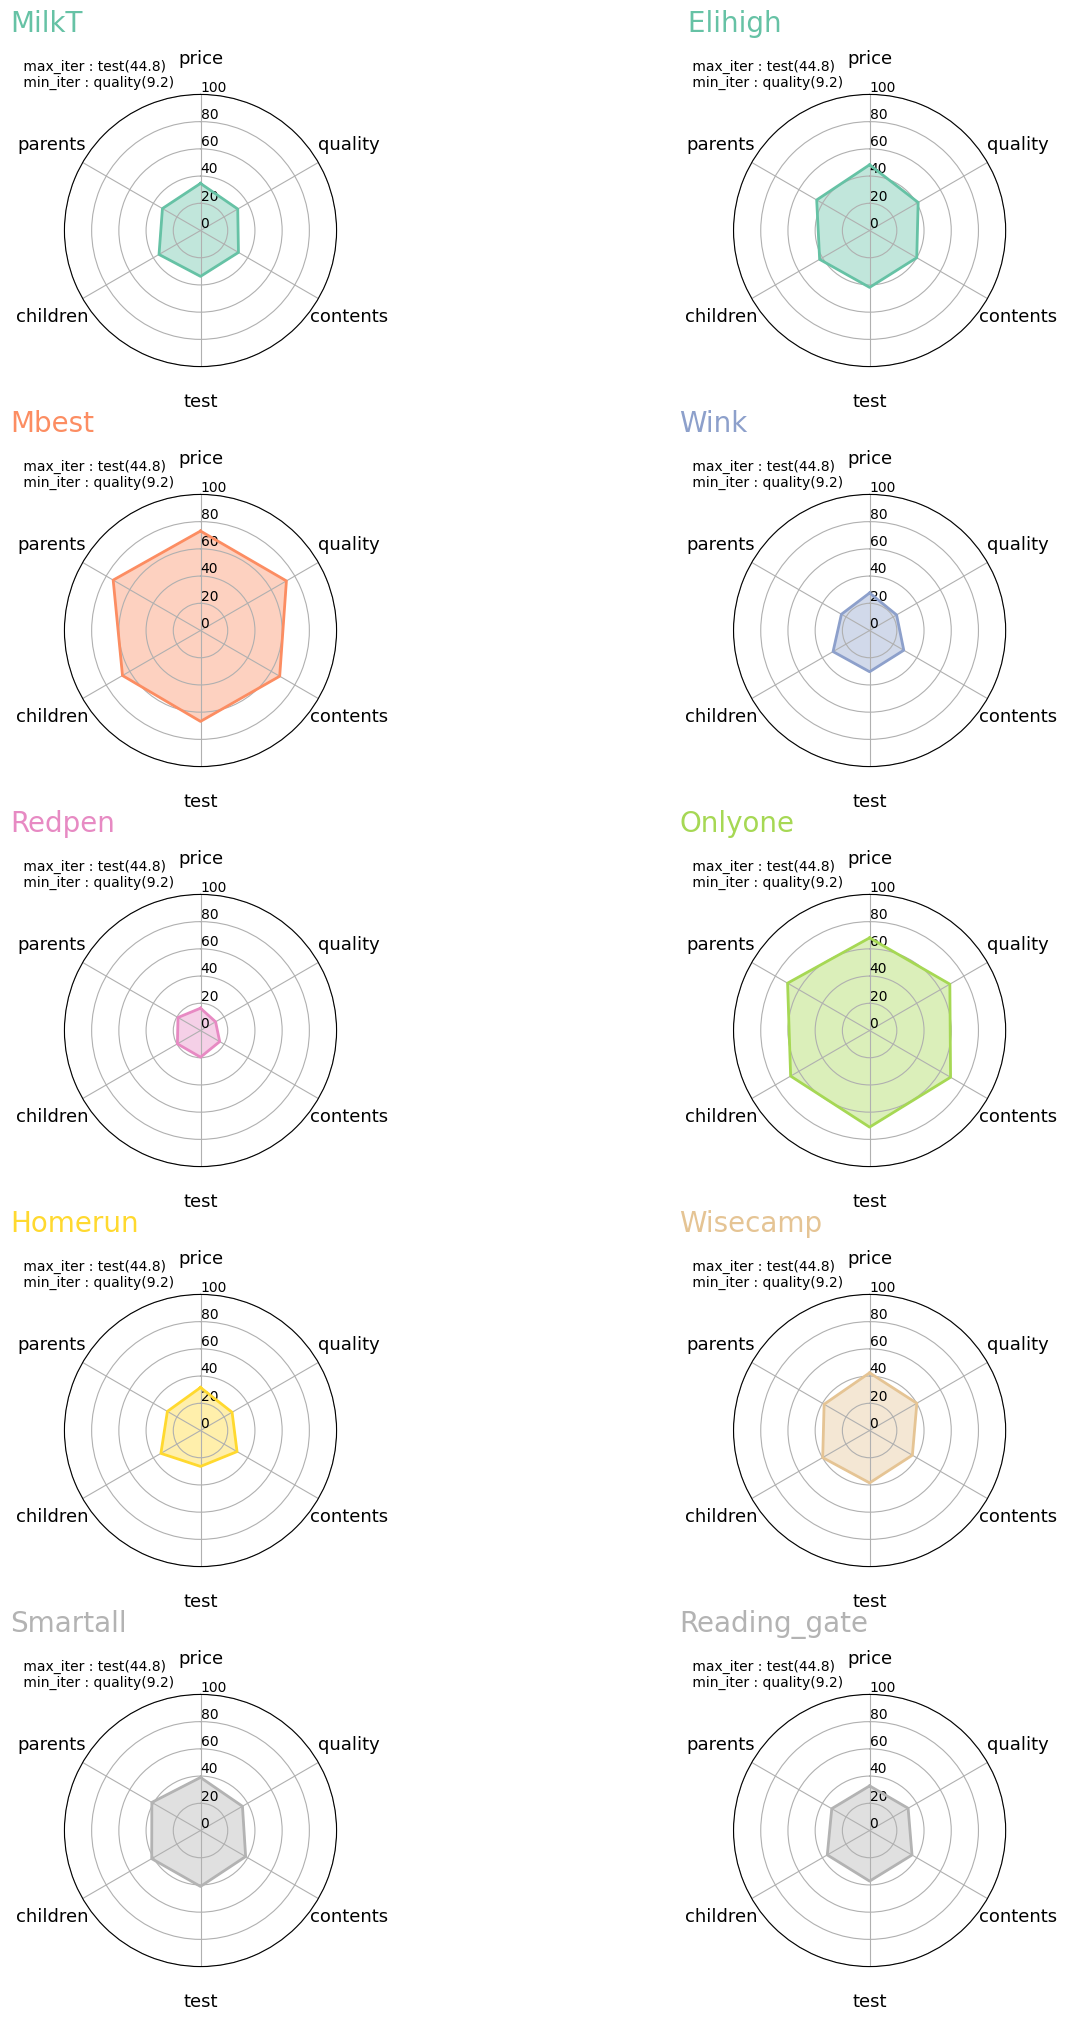

In [ ]:
## 따로 그리기
labels = status.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
subplot_len = math.ceil(len(status)/2)
    
my_palette = plt.cm.get_cmap("Set2", len(status.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in status.iterrows():
    color = my_palette(i)
    data = status.iloc[i].drop('Company').tolist()
    data += data[:1]
    
    ax = plt.subplot(subplot_len,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,20,40,60,80,100],['0','20','40','60','80','100'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Company, size=20, color=color,x=-0.2, y=1.2, ha='left') 
    plt.text(-0.9,170,f' {max_option} \n {min_option}')
    # plt.text(-0.8,180,'text_location')    
 
plt.tight_layout(pad=0) ## subplot간 패딩 조절

# from datetime import datetime
# now = datetime.now()
# # 이미지 저장 (파일이름 : ()YYYYMMhhmm.png)
# # 배경 투명 옵션 : transparent = True
# plt.savefig(str('MilkT'+now.strftime('%Y%m%d%H%M'))+'.png')
# plt.show()

In [ ]:
for i, row in status.iterrows():
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [ ]:
len(status)

11

In [ ]:
round(len(status)/2)

6

In [ ]:
import math

In [ ]:
math.ceil(len(status)/2)

6

In [ ]:
test = []

for i in tqdm(range(len(firm))):
    
    if company.get(firm[i]) != None:
        test.append(1)

    

100%|██████████| 4/4 [00:00<00:00, 14388.69it/s]
